In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [40]:
df = pd.read_csv('./data/df_new_final.csv')
df

,Unnamed: 0,노선명,노선설명,승객연령,환승여부,추가운임여부,승차정류장,승차정류장 GPS X,승차정류장 GPS Y,하차정류장,...,승차년,승차월,승차일,승차시,승차분,승차초,승차분대,승차시간대,승차시각,하차시각
0,0,500,문덕-시외터미널-흥해-청하-월포,일반,N,N,문덕사거리,129.403442,35.962846,대잠사거리,...,2020,1,3,5,15,42,10분대,새벽(0~5시),2020-01-04 05:15:24,2020-01-04 05:24:39
1,1,101,양덕-고속터미널-동해,일반,N,N,삼성쉐르빌,129.405116,36.086449,북구청,...,2020,1,3,5,20,28,20분대,새벽(0~5시),2020-01-04 05:16:07,2020-01-04 05:35:02
2,2,131,양덕-송도-시청-양학-양덕,일반,N,N,우방비치타운,129.376287,36.054774,시외버스터미널,...,2020,1,3,5,21,3,20분대,새벽(0~5시),2020-01-04 05:18:38,2020-01-04 05:29:41
3,3,101,양덕-고속터미널-동해,일반,N,N,풍림아이원,129.401705,36.085096,중앙상가,...,2020,1,3,5,21,26,20분대,새벽(0~5시),2020-01-04 05:21:27,2020-01-04 05:24:30
4,4,108,양덕-죽도-양학-시청-유강-지곡,일반,N,N,장량휴먼시아,129.383462,36.090800,두호초등학교,...,2020,1,3,5,22,17,20분대,새벽(0~5시),2020-01-04 05:22:29,2020-01-04 05:32:28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
841678,841678,102,문덕-남구청-고속터미널-북구보건소-양덕,일반,Y,N,죽도시장,129.365486,36.034110,문화예술회관,...,2020,1,2,23,24,23,20분대,밤(20~23시),2020-01-03 21:05:31,2020-01-03 21:34:14
841679,841679,200,양덕-남구청(야구장)-구룡포,일반,N,N,형산로터리,129.368470,36.011630,뱃머리 평생학습원,...,2020,1,2,23,24,49,20분대,밤(20~23시),2020-01-03 21:05:32,2020-01-03 21:34:08
841680,841680,500,문덕-시외터미널-흥해-청하-월포,일반,N,N,남부경찰서,129.344637,36.005408,연일전통시장,...,2020,1,2,23,28,49,20분대,밤(20~23시),2020-01-03 21:06:32,2020-01-03 21:15:37
841681,841681,107,문덕-시외(고속)터미널-흥해,일반,N,N,쌍용사거리,129.354637,36.015728,화이트빌라,...,2020,1,2,23,35,18,30분대,밤(20~23시),2020-01-03 21:06:34,2020-01-03 21:25:39


In [42]:
df['승차시각'] = pd.to_datetime(df['승차시각'])
df['하차시각'] = pd.to_datetime(df['하차시각'])

In [43]:
df['체류시간'] = df['하차시각'] - df['승차시각']
df

,Unnamed: 0,노선명,노선설명,승객연령,환승여부,추가운임여부,승차정류장,승차정류장 GPS X,승차정류장 GPS Y,하차정류장,...,승차월,승차일,승차시,승차분,승차초,승차분대,승차시간대,승차시각,하차시각,체류시간
0,0,500,문덕-시외터미널-흥해-청하-월포,일반,N,N,문덕사거리,129.403442,35.962846,대잠사거리,...,1,3,5,15,42,10분대,새벽(0~5시),2020-01-04 05:15:24,2020-01-04 05:24:39,0 days 00:09:15
1,1,101,양덕-고속터미널-동해,일반,N,N,삼성쉐르빌,129.405116,36.086449,북구청,...,1,3,5,20,28,20분대,새벽(0~5시),2020-01-04 05:16:07,2020-01-04 05:35:02,0 days 00:18:55
2,2,131,양덕-송도-시청-양학-양덕,일반,N,N,우방비치타운,129.376287,36.054774,시외버스터미널,...,1,3,5,21,3,20분대,새벽(0~5시),2020-01-04 05:18:38,2020-01-04 05:29:41,0 days 00:11:03
3,3,101,양덕-고속터미널-동해,일반,N,N,풍림아이원,129.401705,36.085096,중앙상가,...,1,3,5,21,26,20분대,새벽(0~5시),2020-01-04 05:21:27,2020-01-04 05:24:30,0 days 00:03:03
4,4,108,양덕-죽도-양학-시청-유강-지곡,일반,N,N,장량휴먼시아,129.383462,36.090800,두호초등학교,...,1,3,5,22,17,20분대,새벽(0~5시),2020-01-04 05:22:29,2020-01-04 05:32:28,0 days 00:09:59
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
841678,841678,102,문덕-남구청-고속터미널-북구보건소-양덕,일반,Y,N,죽도시장,129.365486,36.034110,문화예술회관,...,1,2,23,24,23,20분대,밤(20~23시),2020-01-03 21:05:31,2020-01-03 21:34:14,0 days 00:28:43
841679,841679,200,양덕-남구청(야구장)-구룡포,일반,N,N,형산로터리,129.368470,36.011630,뱃머리 평생학습원,...,1,2,23,24,49,20분대,밤(20~23시),2020-01-03 21:05:32,2020-01-03 21:34:08,0 days 00:28:36
841680,841680,500,문덕-시외터미널-흥해-청하-월포,일반,N,N,남부경찰서,129.344637,36.005408,연일전통시장,...,1,2,23,28,49,20분대,밤(20~23시),2020-01-03 21:06:32,2020-01-03 21:15:37,0 days 00:09:05
841681,841681,107,문덕-시외(고속)터미널-흥해,일반,N,N,쌍용사거리,129.354637,36.015728,화이트빌라,...,1,2,23,35,18,30분대,밤(20~23시),2020-01-03 21:06:34,2020-01-03 21:25:39,0 days 00:19:05


## 기준일 및 시간대별 버스내 체류시간(분) 분석비교

In [47]:
m1 = [4,5,11,12,18,19, 25,26]
m2 = [1,2,8,9,15,16,22,23,29]
m3 = [1,7,8,14,15,21,22,28,29]

In [57]:
df.index[(df['승차월']==1)&(df['승차일'] != m1[i])]

Int64Index([     0,      1,      2,      3,      4,      5,      6,      7,
                 8,      9,
            ...
            841673, 841674, 841675, 841676, 841677, 841678, 841679, 841680,
            841681, 841682],
           dtype='int64', length=419214)

In [62]:
df['날짜'] = 'x'

# 1월 날짜
for i in range(len(m1)) :
    row_index = df.index[(df['승차월']==1)&(df['승차일'] == m1[i])]
    df.loc[row_index, '날짜'] = '주말'
    
    row2_index = df.index[(df['승차월']==1)&(df['승차일'] != m1[i])]
    df.loc[row2_index, '날짜'] = '평일'

# 2월 날짜
for i in range(len(m2)) :
    row_index = df.index[(df['승차월']==2)&(df['승차일'] == m2[i])]
    df.loc[row_index, '날짜'] = '주말'
    
    row2_index = df.index[(df['승차월']==2)&(df['승차일'] != m2[i])]
    df.loc[row2_index, '날짜'] = '평일'
    
# 3월 날짜
for i in range(len(m3)) :
    row_index = df.index[(df['승차월']==3)&(df['승차일'] == m3[i])]
    df.loc[row_index, '날짜'] = '주말'
    
    row2_index = df.index[(df['승차월']==3)&(df['승차일'] != m3[i])]
    df.loc[row2_index, '날짜'] = '평일'

df

,Unnamed: 0,노선명,노선설명,승객연령,환승여부,추가운임여부,승차정류장,승차정류장 GPS X,승차정류장 GPS Y,하차정류장,...,승차일,승차시,승차분,승차초,승차분대,승차시간대,승차시각,하차시각,체류시간,날짜
0,0,500,문덕-시외터미널-흥해-청하-월포,일반,N,N,문덕사거리,129.403442,35.962846,대잠사거리,...,3,5,15,42,10분대,새벽(0~5시),2020-01-04 05:15:24,2020-01-04 05:24:39,0 days 00:09:15,평일
1,1,101,양덕-고속터미널-동해,일반,N,N,삼성쉐르빌,129.405116,36.086449,북구청,...,3,5,20,28,20분대,새벽(0~5시),2020-01-04 05:16:07,2020-01-04 05:35:02,0 days 00:18:55,평일
2,2,131,양덕-송도-시청-양학-양덕,일반,N,N,우방비치타운,129.376287,36.054774,시외버스터미널,...,3,5,21,3,20분대,새벽(0~5시),2020-01-04 05:18:38,2020-01-04 05:29:41,0 days 00:11:03,평일
3,3,101,양덕-고속터미널-동해,일반,N,N,풍림아이원,129.401705,36.085096,중앙상가,...,3,5,21,26,20분대,새벽(0~5시),2020-01-04 05:21:27,2020-01-04 05:24:30,0 days 00:03:03,평일
4,4,108,양덕-죽도-양학-시청-유강-지곡,일반,N,N,장량휴먼시아,129.383462,36.090800,두호초등학교,...,3,5,22,17,20분대,새벽(0~5시),2020-01-04 05:22:29,2020-01-04 05:32:28,0 days 00:09:59,평일
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
841678,841678,102,문덕-남구청-고속터미널-북구보건소-양덕,일반,Y,N,죽도시장,129.365486,36.034110,문화예술회관,...,2,23,24,23,20분대,밤(20~23시),2020-01-03 21:05:31,2020-01-03 21:34:14,0 days 00:28:43,평일
841679,841679,200,양덕-남구청(야구장)-구룡포,일반,N,N,형산로터리,129.368470,36.011630,뱃머리 평생학습원,...,2,23,24,49,20분대,밤(20~23시),2020-01-03 21:05:32,2020-01-03 21:34:08,0 days 00:28:36,평일
841680,841680,500,문덕-시외터미널-흥해-청하-월포,일반,N,N,남부경찰서,129.344637,36.005408,연일전통시장,...,2,23,28,49,20분대,밤(20~23시),2020-01-03 21:06:32,2020-01-03 21:15:37,0 days 00:09:05,평일
841681,841681,107,문덕-시외(고속)터미널-흥해,일반,N,N,쌍용사거리,129.354637,36.015728,화이트빌라,...,2,23,35,18,30분대,밤(20~23시),2020-01-03 21:06:34,2020-01-03 21:25:39,0 days 00:19:05,평일


### 체류시간_분 컬럼 생성

In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 841683 entries, 0 to 841682
Data columns (total 24 columns):
 #   Column       Non-Null Count   Dtype          
---  ------       --------------   -----          
 0   Unnamed: 0   841683 non-null  int64          
 1   노선명          841683 non-null  object         
 2   노선설명         841683 non-null  object         
 3   승객연령         841683 non-null  object         
 4   환승여부         841683 non-null  object         
 5   추가운임여부       841683 non-null  object         
 6   승차정류장        841683 non-null  object         
 7   승차정류장 GPS X  841683 non-null  float64        
 8   승차정류장 GPS Y  841683 non-null  float64        
 9   하차정류장        841683 non-null  object         
 10  하차정류장 GPS X  841683 non-null  float64        
 11  하차정류장 GPS Y  841683 non-null  float64        
 12  승차년          841683 non-null  int64          
 13  승차월          841683 non-null  int64          
 14  승차일          841683 non-null  int64          
 15  승차시          8416

In [83]:
import datetime

In [96]:
df['체류시'] = df['하차시각'].dt.hour - df['승차시각'].dt.hour
df['체류분'] = df['하차시각'].dt.minute - df['승차시각'].dt.minute
df

,Unnamed: 0,노선명,노선설명,승객연령,환승여부,추가운임여부,승차정류장,승차정류장 GPS X,승차정류장 GPS Y,하차정류장,...,승차분,승차초,승차분대,승차시간대,승차시각,하차시각,체류시간,날짜,체류시,체류분
0,0,500,문덕-시외터미널-흥해-청하-월포,일반,N,N,문덕사거리,129.403442,35.962846,대잠사거리,...,15,42,10분대,새벽(0~5시),2020-01-04 05:15:24,2020-01-04 05:24:39,0 days 00:09:15,평일,0.0,9.0
1,1,101,양덕-고속터미널-동해,일반,N,N,삼성쉐르빌,129.405116,36.086449,북구청,...,20,28,20분대,새벽(0~5시),2020-01-04 05:16:07,2020-01-04 05:35:02,0 days 00:18:55,평일,0.0,19.0
2,2,131,양덕-송도-시청-양학-양덕,일반,N,N,우방비치타운,129.376287,36.054774,시외버스터미널,...,21,3,20분대,새벽(0~5시),2020-01-04 05:18:38,2020-01-04 05:29:41,0 days 00:11:03,평일,0.0,11.0
3,3,101,양덕-고속터미널-동해,일반,N,N,풍림아이원,129.401705,36.085096,중앙상가,...,21,26,20분대,새벽(0~5시),2020-01-04 05:21:27,2020-01-04 05:24:30,0 days 00:03:03,평일,0.0,3.0
4,4,108,양덕-죽도-양학-시청-유강-지곡,일반,N,N,장량휴먼시아,129.383462,36.090800,두호초등학교,...,22,17,20분대,새벽(0~5시),2020-01-04 05:22:29,2020-01-04 05:32:28,0 days 00:09:59,평일,0.0,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
841678,841678,102,문덕-남구청-고속터미널-북구보건소-양덕,일반,Y,N,죽도시장,129.365486,36.034110,문화예술회관,...,24,23,20분대,밤(20~23시),2020-01-03 21:05:31,2020-01-03 21:34:14,0 days 00:28:43,평일,0.0,29.0
841679,841679,200,양덕-남구청(야구장)-구룡포,일반,N,N,형산로터리,129.368470,36.011630,뱃머리 평생학습원,...,24,49,20분대,밤(20~23시),2020-01-03 21:05:32,2020-01-03 21:34:08,0 days 00:28:36,평일,0.0,29.0
841680,841680,500,문덕-시외터미널-흥해-청하-월포,일반,N,N,남부경찰서,129.344637,36.005408,연일전통시장,...,28,49,20분대,밤(20~23시),2020-01-03 21:06:32,2020-01-03 21:15:37,0 days 00:09:05,평일,0.0,9.0
841681,841681,107,문덕-시외(고속)터미널-흥해,일반,N,N,쌍용사거리,129.354637,36.015728,화이트빌라,...,35,18,30분대,밤(20~23시),2020-01-03 21:06:34,2020-01-03 21:25:39,0 days 00:19:05,평일,0.0,19.0


In [101]:
# df['체류시간_분'] = df['체류시']/60 + df['체류분']
# df
df['체류시간_분'] = df['체류시간'].astype('timedelta64[m]')

### 날짜 및 시간대별 버스내 체류시간 분석

In [114]:
pivot_hour_day1 = df[df['승차월']==1].pivot_table(values = '체류시간_분',
                             index = '승차시간대', columns='날짜',
                             aggfunc = 'mean')

pivot_hour_day1

날짜,주말,평일
승차시간대,,
밤(20~23시),13.031465,15.547718
새벽(0~5시),16.340426,14.439117
아침(6~8시),17.111517,16.016502
오전(9~12시),16.535241,17.202764
오후(13~16시),17.965067,16.709555
저녁(5~7시),14.850271,16.948575


In [111]:
pivot_hour_day2 = df[df['승차월']==2].pivot_table(values = '체류시간_분',
                             index = '승차시간대', columns='날짜',
                             aggfunc = 'mean')

pivot_hour_day2

날짜,주말,평일
승차시간대,,
밤(20~23시),15.160458,15.182519
새벽(0~5시),13.340426,16.007603
아침(6~8시),14.741042,16.209782
오전(9~12시),15.227480,16.189463
오후(13~16시),13.653620,15.897644
저녁(5~7시),15.943730,15.242828


In [112]:
pivot_hour_day3 = df[df['승차월']==3].pivot_table(values = '체류시간_분',
                             index = '승차시간대', columns='날짜',
                             aggfunc = 'mean')

pivot_hour_day3

날짜,주말,평일
승차시간대,,
밤(20~23시),16.708861,16.159487
새벽(0~5시),8.533333,15.827991
아침(6~8시),15.145833,15.715840
오전(9~12시),16.685879,15.561893
오후(13~16시),15.749104,15.645709
저녁(5~7시),15.075000,15.620329


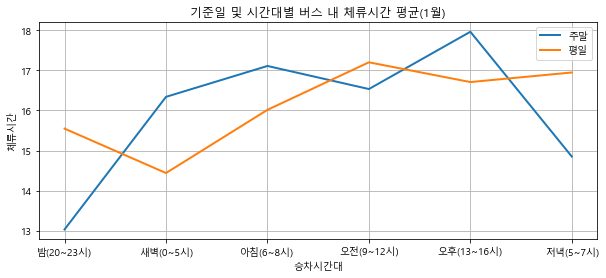

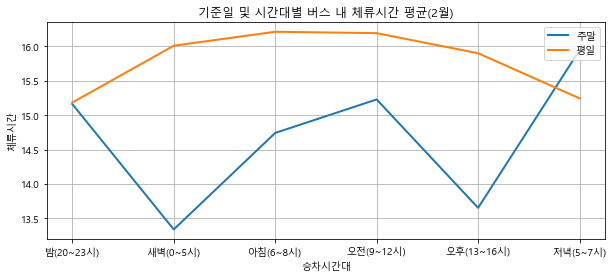

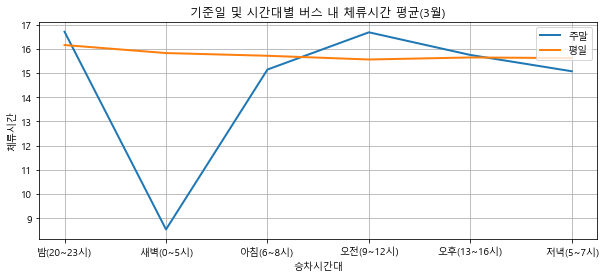

In [116]:
# 1월
plt.rcParams['figure.figsize'] = (10,4)

plt.rcParams['lines.linewidth'] = 2

plt.rc('font', family = 'Malgun Gothic', size = 10)

pivot_hour_day1.plot()

plt.title('기준일 및 시간대별 버스 내 체류시간 평균(1월)')
plt.ylabel('체류시간')

plt.legend(loc='upper right')

plt.grid(True)

plt.show()

# 2월
plt.rcParams['figure.figsize'] = (10,4)

plt.rcParams['lines.linewidth'] = 2

plt.rc('font', family = 'Malgun Gothic', size = 10)

pivot_hour_day2.plot()

plt.title('기준일 및 시간대별 버스 내 체류시간 평균(2월)')
plt.ylabel('체류시간')

plt.legend(loc='upper right')

plt.grid(True)

plt.show()

# 3월
plt.rcParams['figure.figsize'] = (10,4)

plt.rcParams['lines.linewidth'] = 2

plt.rc('font', family = 'Malgun Gothic', size = 10)

pivot_hour_day3.plot()

plt.title('기준일 및 시간대별 버스 내 체류시간 평균(3월)')
plt.ylabel('체류시간')

plt.legend(loc='upper right')

plt.grid(True)

plt.show()

In [ ]:
'''
월별로 날짜 및 승차시간대별 버스 내 체류시간에 대해 살펴보았다.
1월은 평일과 주말 모두 버스 이용량이 전반적으로 높게 나타났다.
반면 2월은 평일에 버스를 이용량이 높게 나타났으며, 오히려 주말 이용량이 낮게 나타났다.
'''

## 시간 및 승객별 비교 분석

### 빈도분석

<AxesSubplot:>

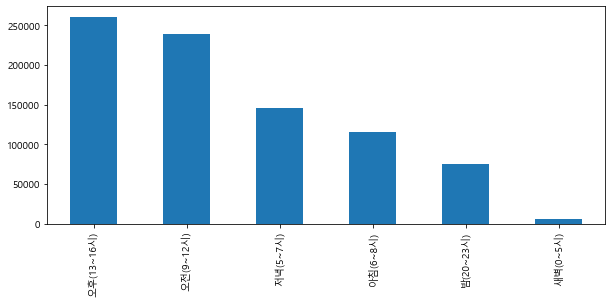

In [136]:
df['승차시간대'].value_counts().plot.bar()

<AxesSubplot:>

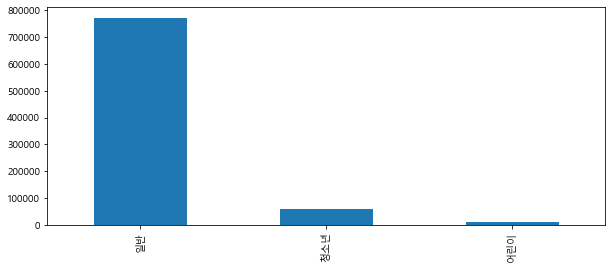

In [137]:
df['승객연령'].value_counts().plot.bar()

### 교차분석

In [129]:
cross_df = pd.crosstab(df['승차시간대'], df['승객연령'])

<AxesSubplot:xlabel='승차시간대'>

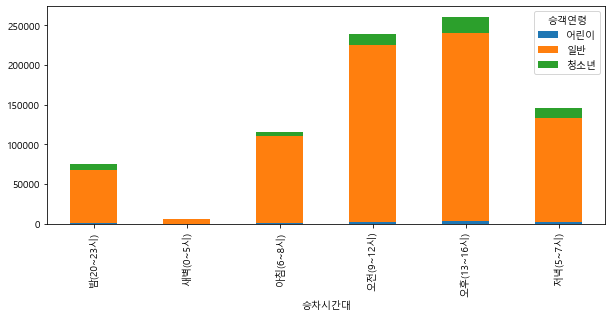

In [135]:
cross_df.plot.bar(stacked=True)

In [ ]:
'''
승객연령별 승차시간대를 살펴보면 일반승객이 대부분인 것을 확인 할 수 있다.
그 다음으로 청소년승객인 것으로 나타났으나 일반승객과 차이가 크게 나타났다.
또한, 오후 시간대에 일반승객과 청소년승객 모두 버스이용량이 높게 나타났다.
'''